In [1]:
#########Clustering_Analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.shape

(3999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
# Keep only numeric columns
df_num = df.select_dtypes(include=['float64','int64'])
df_num

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
# Handle Missing Values
#df_num = df_num.fillna(df_num.mean()) 
df_num = df_num.dropna()
df_num 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
#Remove Outliers using IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
df_clean = df_num[~((df_num < (Q1 - 1.5*IQR)) | (df_num > (Q3 + 1.5*IQR))).any(axis=1)]
df_clean

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)
X_scaled 

array([[-1.83464329, -0.43885929,  0.        , ..., -0.40970772,
         1.50369284, -0.62307163],
       [-1.83377495, -0.64773487,  0.        , ..., -0.40970772,
         1.48803468, -0.62307163],
       [-1.83290661, -0.1287733 ,  0.        , ..., -0.40970772,
         1.52032964, -0.62307163],
       ...,
       [ 1.65435035,  0.62802805,  0.        , ..., -0.40970772,
        -1.23550729,  1.60495191],
       [ 1.65521869,  0.18915227,  0.        , ...,  1.65318143,
        -1.23599661, -0.62307163],
       [ 1.65608703, -1.02863529,  0.        , ..., -0.40970772,
        -1.23746456, -0.62307163]])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df_clean.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2875.000000,2875.000000,2875.0,2875.000000,2875.0,2875.0,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000
mean,2113.814609,46840.297739,0.0,1.829913,1.0,1.0,10872.930435,9.385739,57.085217,0.198609,3926.959652,0.279652
std,1151.821810,42611.722286,0.0,1.154373,0.0,0.0,13664.119401,7.753492,150.711569,0.484841,2044.017792,0.448906
min,1.000000,50.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,1131.500000,15275.000000,0.0,1.000000,1.0,1.0,500.000000,2.000000,0.000000,0.000000,2154.500000,0.000000
50%,2167.000000,33327.000000,0.0,1.000000,1.0,1.0,4500.000000,9.000000,0.000000,0.000000,3805.000000,0.000000
75%,3101.500000,65980.500000,0.0,3.000000,1.0,1.0,17089.000000,15.000000,0.000000,0.000000,5566.000000,1.000000
max,4021.000000,202636.000000,0.0,5.000000,1.0,1.0,57382.000000,38.000000,767.000000,2.000000,8296.000000,1.000000


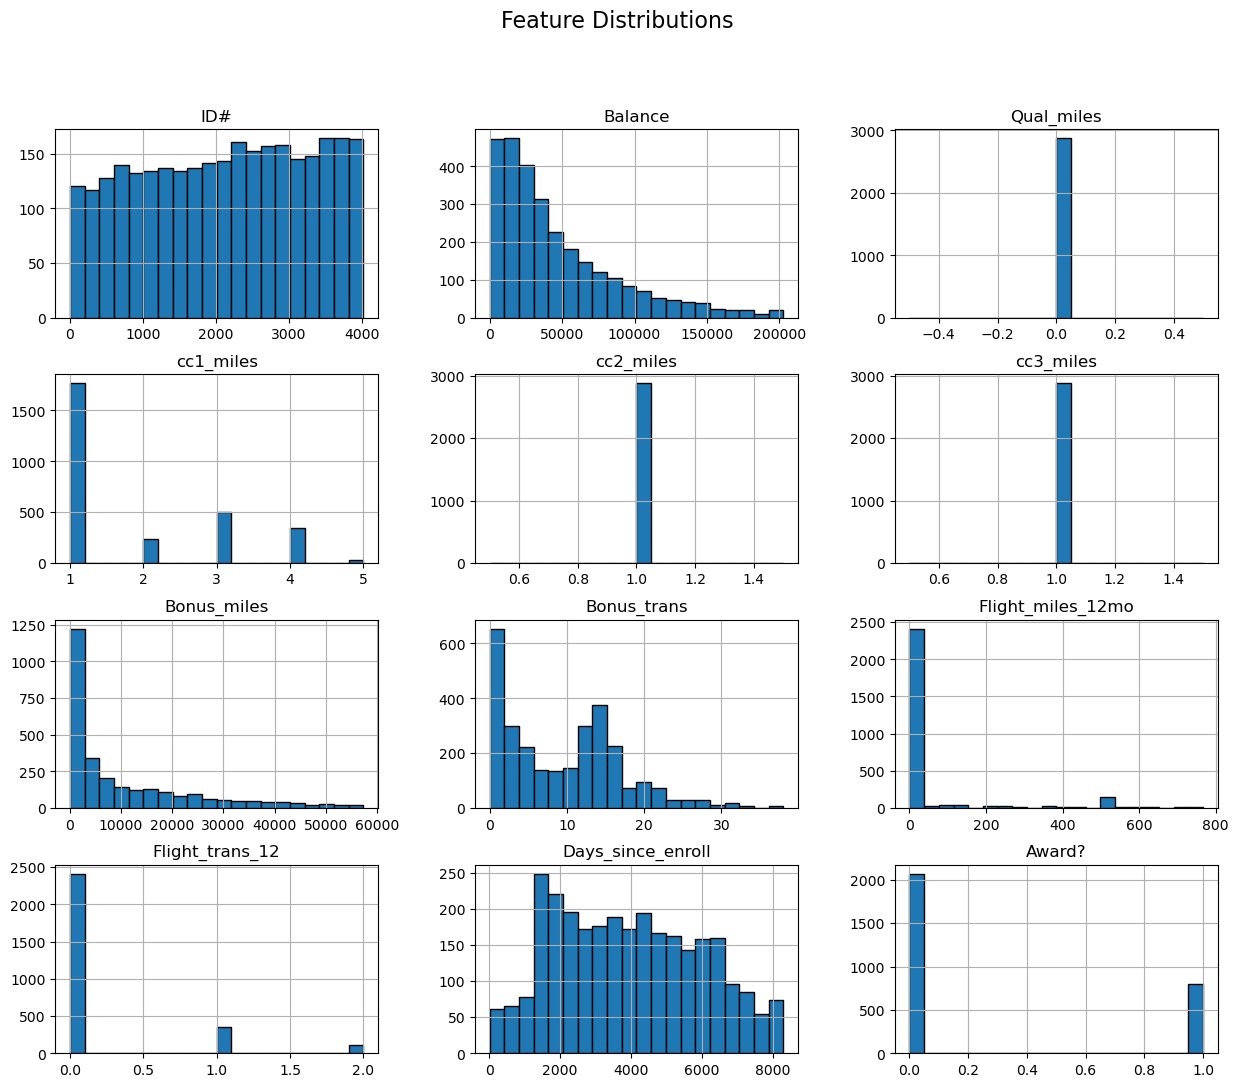

In [11]:
#Distribution plots
df_clean.hist(figsize=(15,12), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

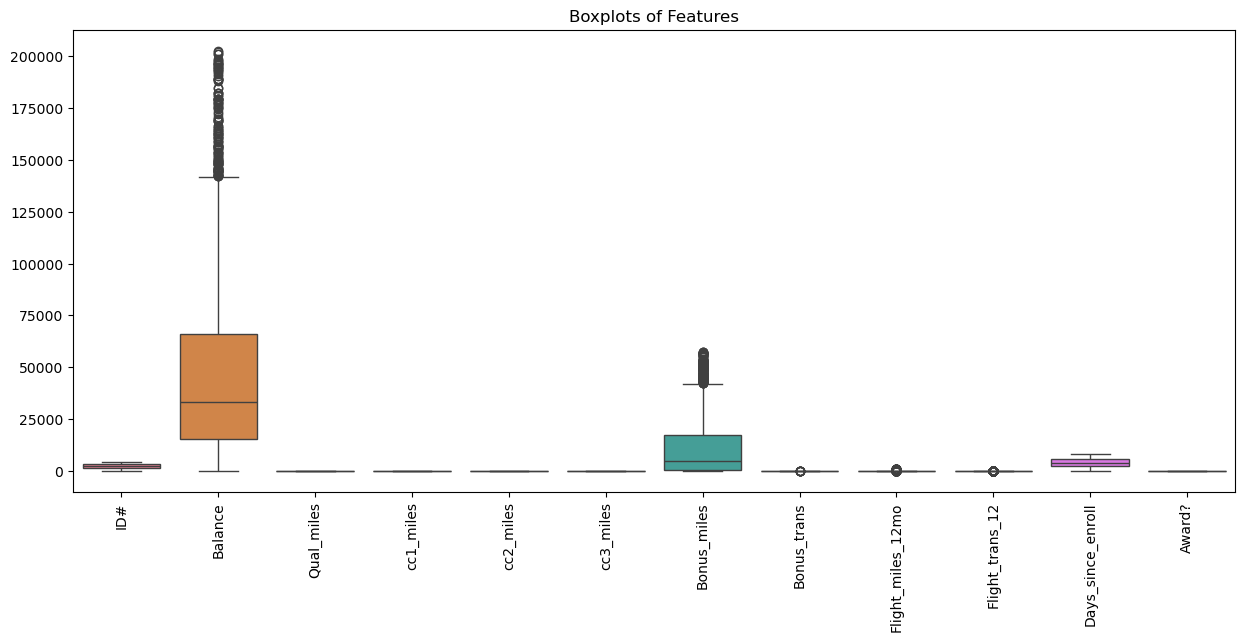

In [12]:
#Boxplots (Outlier detection)
plt.figure(figsize=(15,6))
sns.boxplot(data=df_clean)
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show()

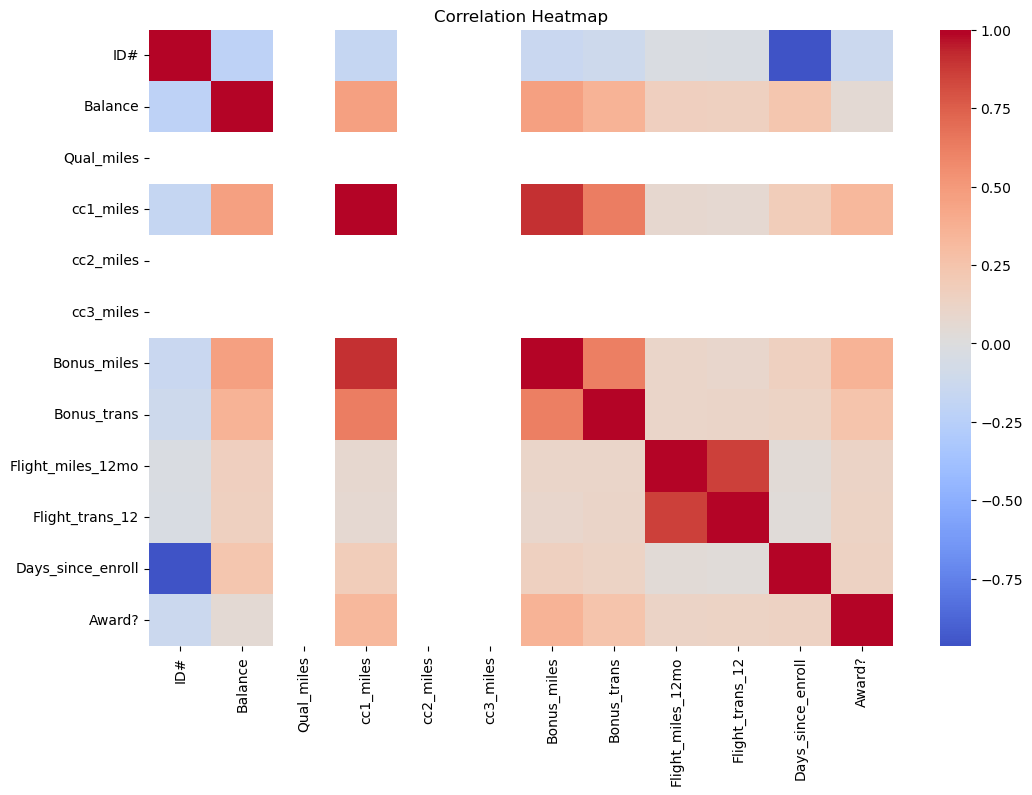

In [13]:
#Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

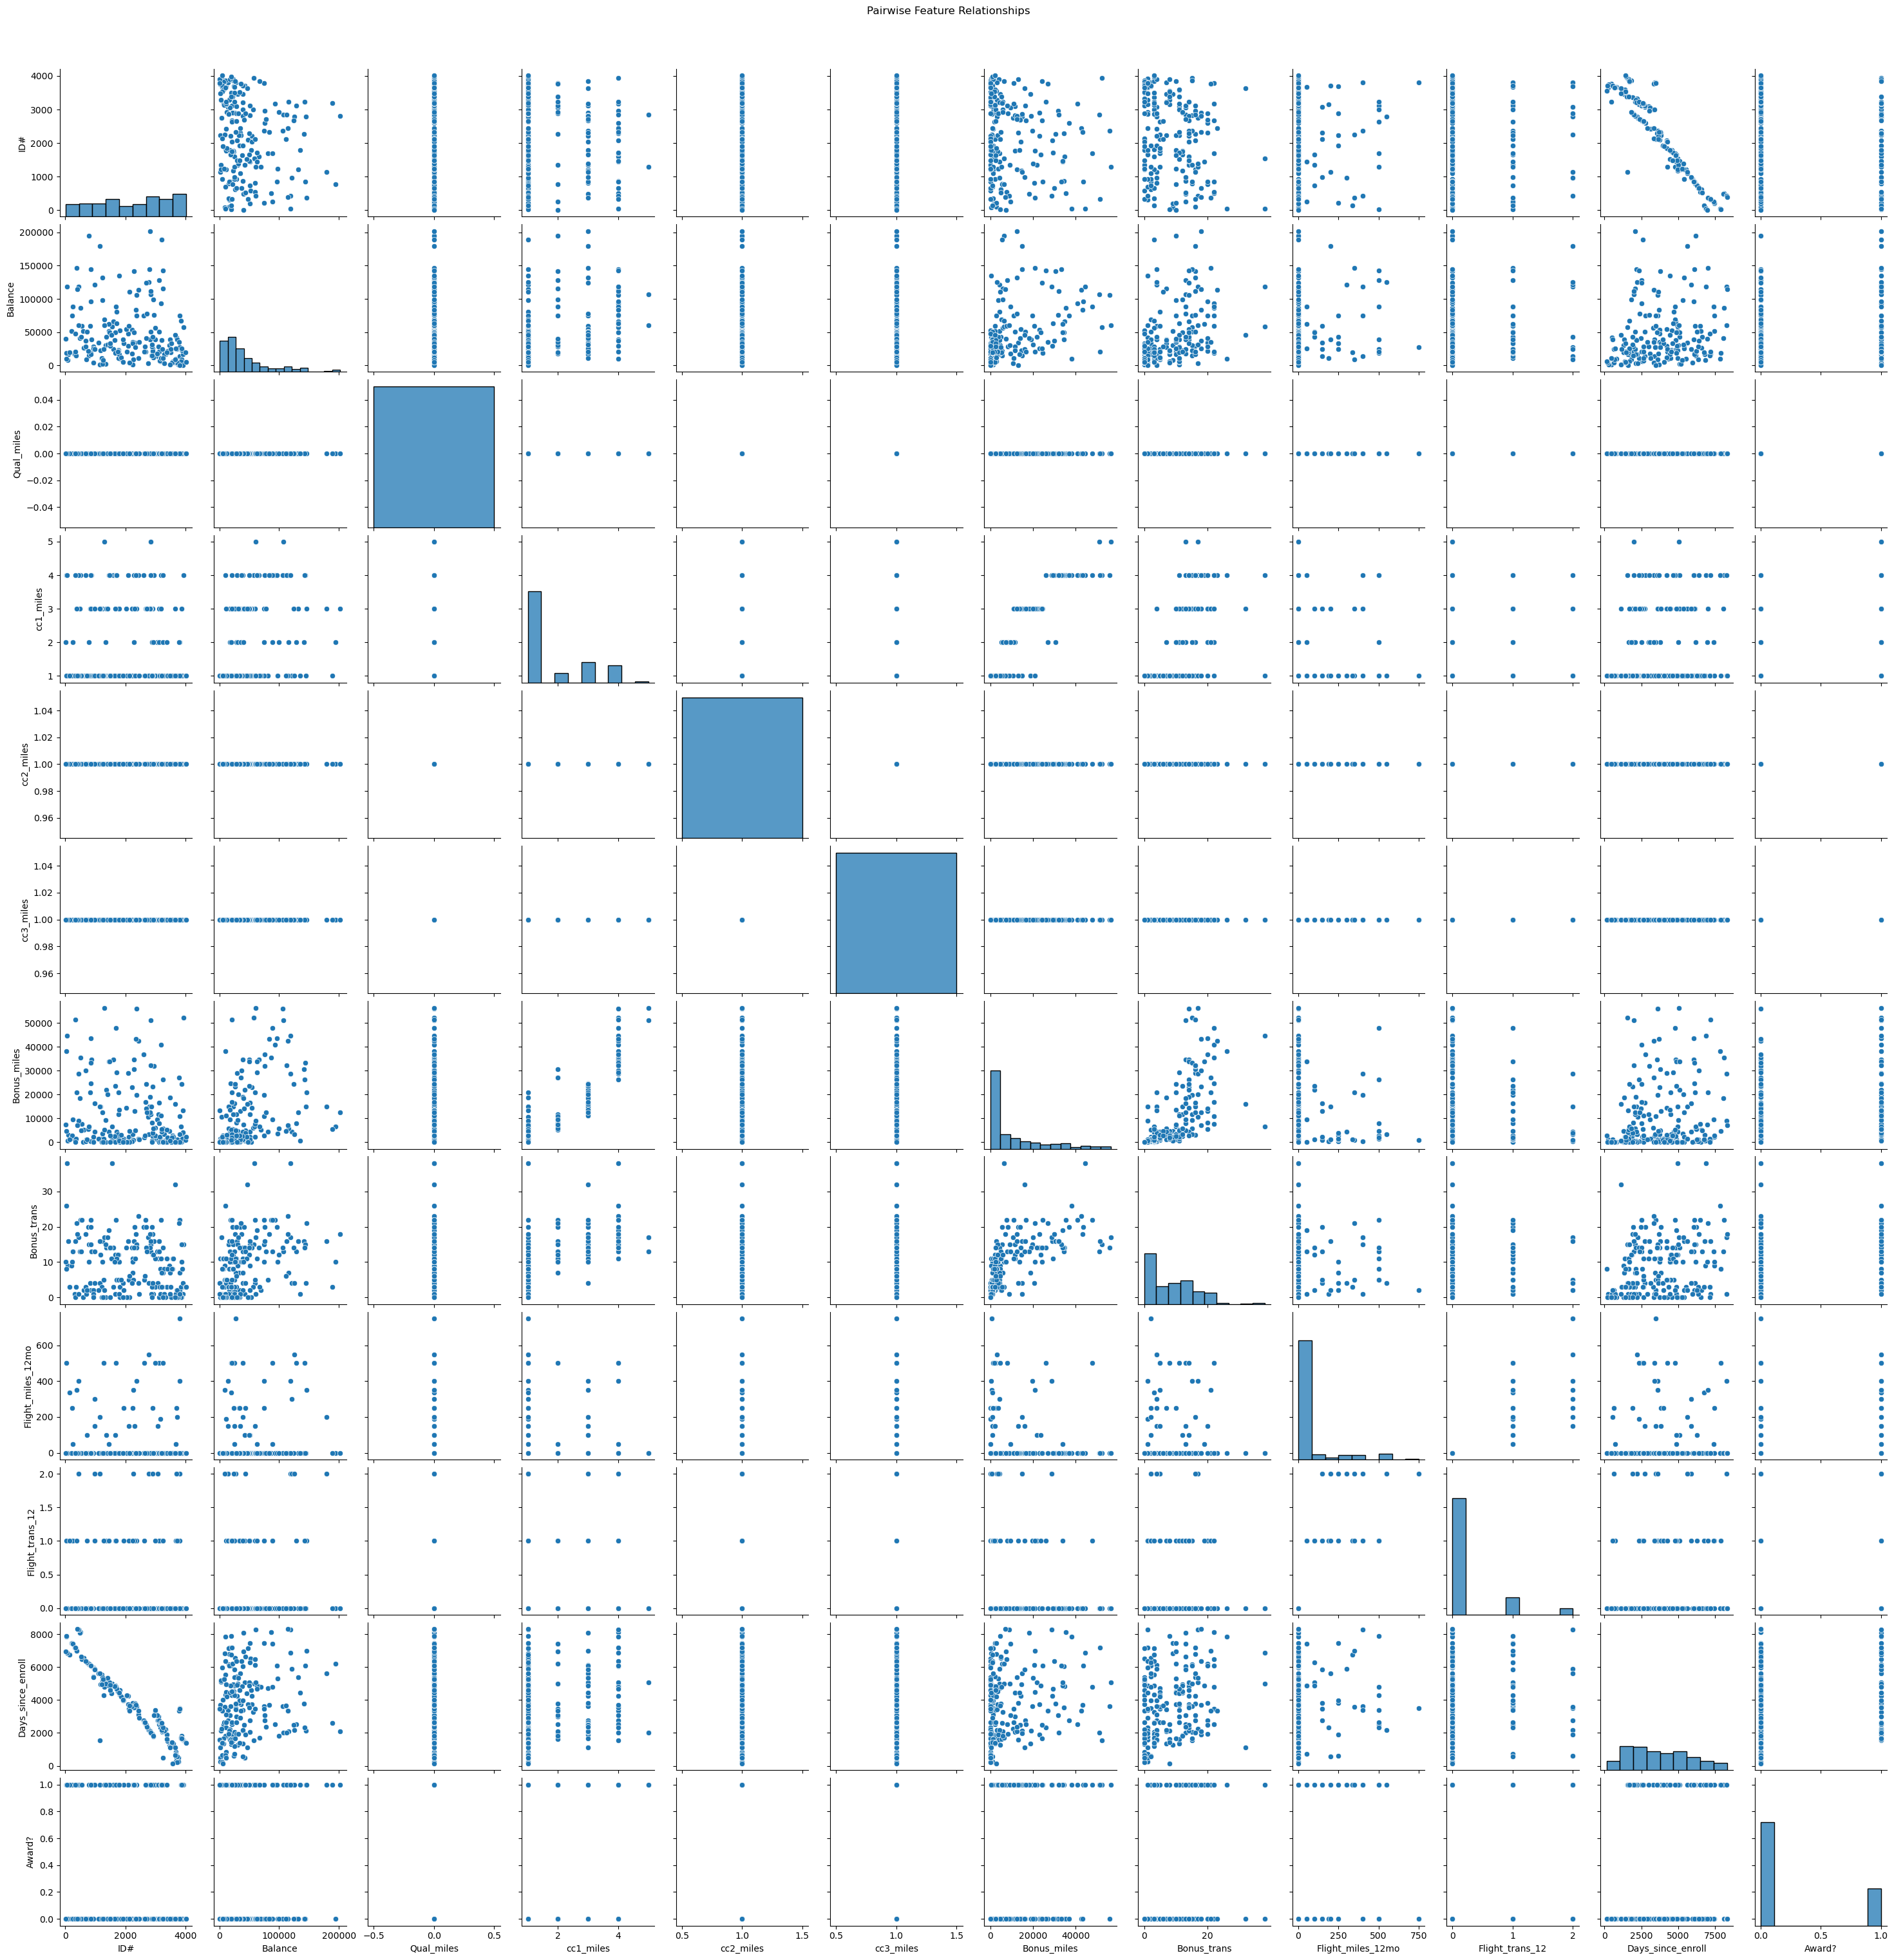

In [14]:
#Pairplot (scatter plots between features)
sns.pairplot(df_clean.sample(200))  
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

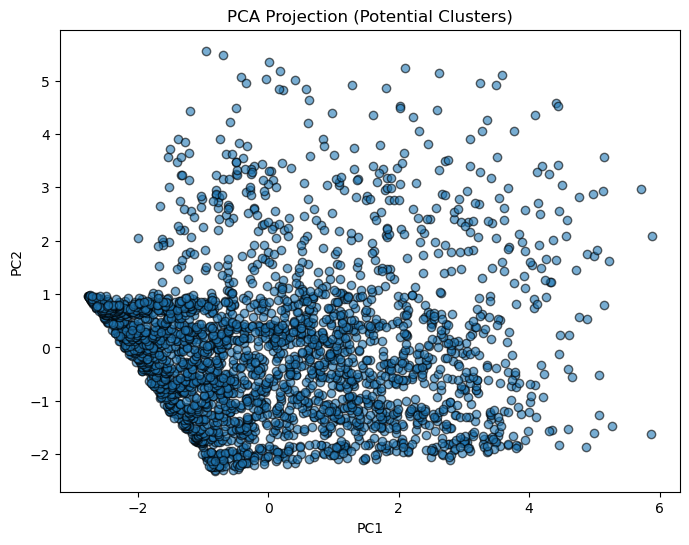

In [15]:
# PCA for 2D visualization (to detect potential clusters)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6, edgecolor="k")
plt.title("PCA Projection (Potential Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [17]:
# K-MEANS CLUSTERING
wcss = []

In [18]:
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

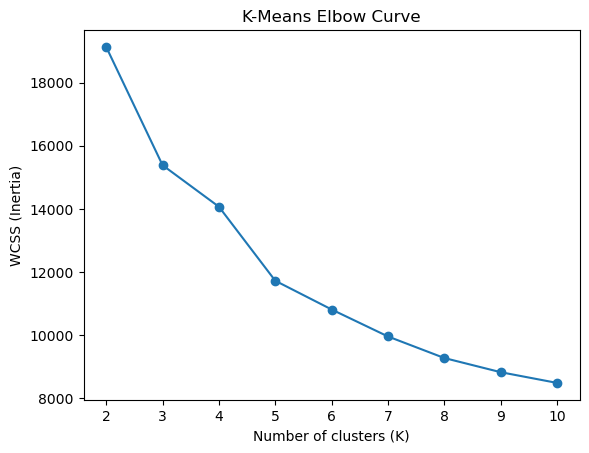

In [19]:
# Elbow Curve
plt.plot(range(2,11), wcss, marker="o")
plt.title("K-Means Elbow Curve")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [20]:
# Choose K
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_labels

array([1, 1, 1, ..., 2, 0, 1])

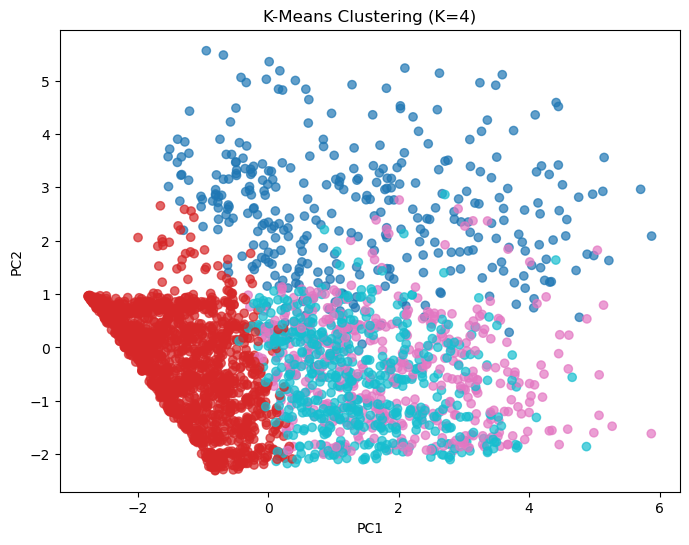

In [21]:
# Visualize with PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="tab10", alpha=0.7)
plt.title("K-Means Clustering (K=4)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

In [22]:
#K-Means Silhouette Score:
silhouette_score(X_scaled, kmeans_labels)

0.28357826594485636

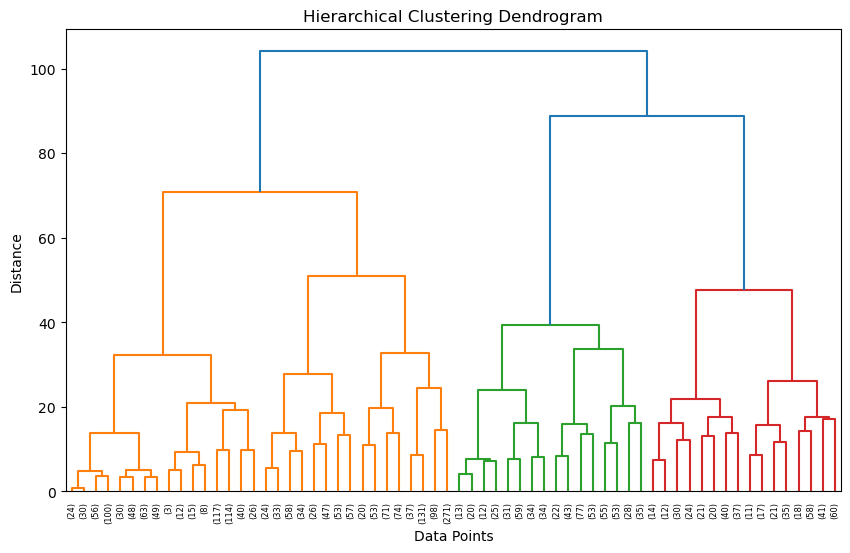

In [23]:
#HIERARCHICAL CLUSTERING
# Dendrogram
plt.figure(figsize=(10,6))
linkage_matrix = linkage(X_scaled, method="ward")
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points"); plt.ylabel("Distance")
plt.show()

In [24]:
# Apply Agglomerative Clustering
hier = AgglomerativeClustering(n_clusters=4, linkage="ward")
hier_labels = hier.fit_predict(X_scaled)

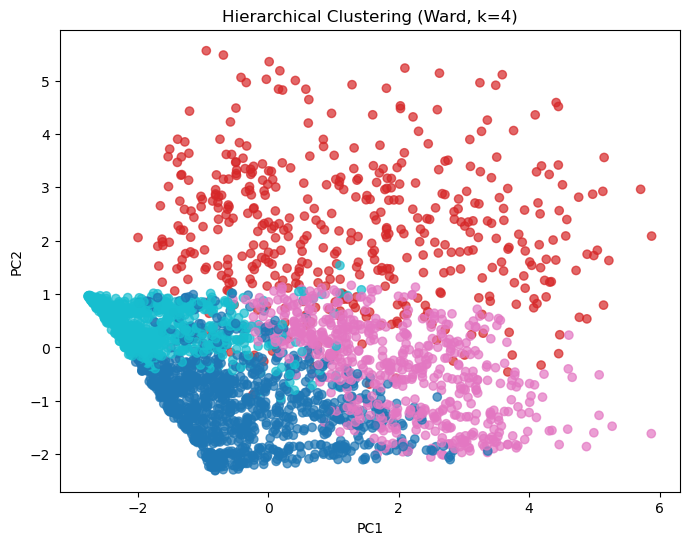

In [25]:
# Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=hier_labels, cmap="tab10", alpha=0.7)
plt.title("Hierarchical Clustering (Ward, k=4)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

In [26]:
#Hierarchical Silhouette Score:
silhouette_score(X_scaled, hier_labels)

0.211818801401053

In [27]:
# DBSCAN CLUSTERING
dbscan = DBSCAN(eps=2, min_samples=5)   
db_labels = dbscan.fit_predict(X_scaled)

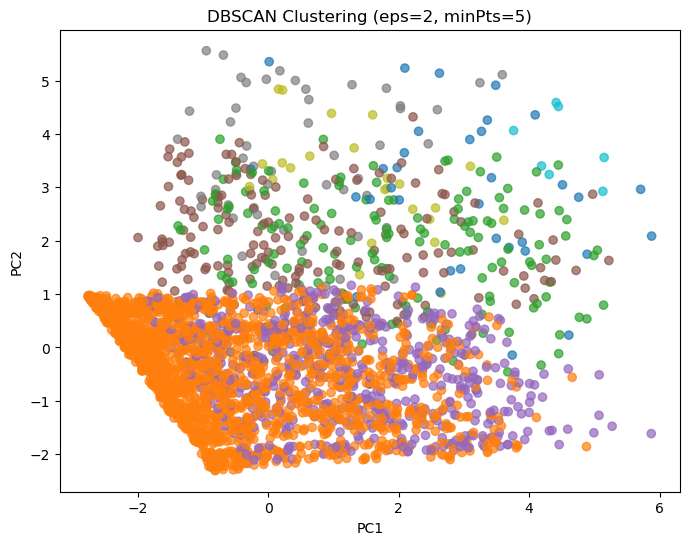

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap="tab10", alpha=0.7)
plt.title("DBSCAN Clustering (eps=2, minPts=5)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

In [29]:
# Some points may be -1 (noise)
unique, counts = np.unique(db_labels, return_counts=True)
print("DBSCAN Cluster Counts:", dict(zip(unique, counts)))

DBSCAN Cluster Counts: {-1: 34, 0: 1805, 1: 145, 2: 607, 3: 200, 4: 53, 5: 24, 6: 7}


In [30]:
# Silhouette Score only if >1 cluster
if len(set(db_labels)) > 1 and -1 not in set(db_labels):
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, db_labels))
else:
    print("DBSCAN not suitable (too much noise / only 1 cluster)")

DBSCAN not suitable (too much noise / only 1 cluster)


In [31]:
from sklearn.preprocessing import StandardScaler
# Keep only numeric columns for clustering
df_numeric = df.select_dtypes(include=["float64", "int64"])

In [32]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [33]:
# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns, index=df_numeric.index)
df_scaled

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [35]:
# Hierarchical
hierarchical = AgglomerativeClustering(n_clusters=5, linkage="ward")
hier_labels = hierarchical.fit_predict(df_scaled)

In [36]:
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(df_scaled)

In [37]:
# Copy scaled DataFrame
df_clusters = df_scaled.copy()

In [38]:
# Add cluster labels
df_clusters["KMeans_Cluster"] = kmeans_labels
df_clusters["Hierarchical_Cluster"] = hier_labels
df_clusters["DBSCAN_Cluster"] = db_labels

In [39]:
# Cluster Profiles (mean values per cluster)

In [40]:
# K-Means Cluster Characteristics
#K-Means Cluster Profiles:
print(df_clusters.groupby("KMeans_Cluster").mean())

                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                         
0              -0.169084 -0.132240    0.077992  -0.189233   0.030208   
1              -0.472020  0.696390   -0.004830   1.569250  -0.081115   
2              -0.729293 -0.165189   -0.094146  -0.446131   0.000116   
3              -0.303403  1.327675    0.896742   0.186145   0.207334   
4               1.039828 -0.361457   -0.063857  -0.523978   0.010049   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                           
0               -0.062767    -0.225803    -0.024501          -0.023722   
1                0.248082     1.462752     0.897209          -0.044459   
2               -0.057808    -0.466725    -0.366729          -0.205835   
3               -0.062767     0.772040     1.865053           3.865602   
4               -0.062767    -0.478802    -0.447269

In [41]:
# Hierarchical Cluster Characteristics
#Hierarchical Cluster Profiles:
print(df_clusters.groupby("Hierarchical_Cluster").mean())

                           ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                         
0                    -0.275280  0.274659    0.138293   0.547303  -0.098242   
1                     0.322341 -0.351127   -0.174106  -0.636011  -0.098242   
2                    -0.225627  0.858111    0.555185   0.325711  -0.098242   
3                     0.219325 -0.046890   -0.156236  -0.668227   9.038254   
4                    -0.234681  0.559233   -0.101411   0.965591  -0.098242   

                      cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                           
0                     -0.062767     0.425556     0.387247           0.046271   
1                     -0.062767    -0.553838    -0.558553          -0.247371   
2                     -0.062767     1.059262     2.347378           5.491697   
3                     -0.062767    -0.101665     0.61

In [42]:
# DBSCAN Cluster Characteristics (ignoring noise = -1)
#DBSCAN Cluster Profiles:
print(df_clusters[df_clusters["DBSCAN_Cluster"] != -1].groupby("DBSCAN_Cluster").mean())

                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                         
0               0.144170 -0.172750   -0.148643  -0.273159  -0.098242   
1              -0.216900 -0.026515   -0.130037   0.416116  -0.098242   
2               0.378344 -0.347792   -0.186299  -0.769578   6.675367   
3               0.565910 -0.367963   -0.186299  -0.769578  13.448976   
4               1.098922 -0.107969   -0.186299   1.227884  -0.098242   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                           
0               -0.062767    -0.314482    -0.302884          -0.209096   
1               -0.062767     0.309086     0.203317          -0.077509   
2               -0.062767    -0.339296     0.138653          -0.285747   
3               -0.062767    -0.067349     0.301803          -0.292890   
4               -0.062767     0.720523     1.994052

In [43]:
#### Thanks You ###